In [79]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px  
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

In [89]:
df= pd.read_csv('mcp 1.csv')
df.shape

(5000, 19)

In [90]:
df.describe(include='all')

Campaign_ID    Channel Product_Category        Region        Budget  \
count         4741       4746             4733          4739  4.500000e+03   
unique        4741          6                5             6           NaN   
top        CAM0001  Billboard      Electronics  Kuala Lumpur           NaN   
freq             1        990              978           988           NaN   
mean           NaN        NaN              NaN           NaN  3.196766e+05   
std            NaN        NaN              NaN           NaN  7.511176e+05   
min            NaN        NaN              NaN           NaN  1.001400e+04   
25%            NaN        NaN              NaN           NaN  1.379872e+05   
50%            NaN        NaN              NaN           NaN  2.659450e+05   
75%            NaN        NaN              NaN           NaN  3.855895e+05   
max            NaN        NaN              NaN           NaN  4.175610e+07   

               Spend   Impressions         Clicks          CTR   Conversions  \
count   4.501000e+03  4.496000e+03    4514.000000  4502.000000   4506.000000   
unique           NaN           NaN            NaN          NaN           NaN   
top              NaN           NaN            NaN          NaN           NaN   
freq             NaN           NaN            NaN          NaN           NaN   
mean    2.754637e+05  6.050865e+05   27467.000985     0.585820   5591.891502   
std     3.985757e+05  1.643209e+06   23203.538244     0.800421   5629.011928   
min     1.000000e+00  1.593000e+03     104.000000     0.000500     13.000000   
25%     1.113680e+05  2.624278e+05   12713.750000     0.250425   2604.250000   
50%     2.292810e+05  5.089675e+05   26232.000000     0.500150   5076.500000   
75%     3.445920e+05  7.663295e+05   38618.250000     0.760400   7578.000000   
max     4.317430e+06  9.991660e+07  250409.021300     9.570650  67712.567350   

                 CR       Revenue          ROI     Duration Start_Date  \
count   4504.000000  4.491000e+03  4505.000000  4521.000000       4741   
unique          NaN           NaN          NaN          NaN        366   
top             NaN           NaN          NaN          NaN  11/9/2023   
freq            NaN           NaN          NaN          NaN         24   
mean       0.556345  5.962208e+05     2.816823   200.590123        NaN   
std        0.580404  7.834836e+05     2.769284   173.398322        NaN   
min        0.000300  0.000000e+00     0.000000     1.000000        NaN   
25%        0.261425  2.574585e+05     1.270000    94.000000        NaN   
50%        0.507450  5.093340e+05     2.610000   188.000000        NaN   
75%        0.755375  7.717310e+05     3.830000   278.000000        NaN   
max        7.369659  9.717200e+06    29.526004  1911.832921        NaN   

        End_Date  Customer_Satisfaction  Campaign_Effectiveness Market_Segment  
count       4743            4508.000000             4510.000000           4738  
unique       366                    NaN                     NaN              3  
top     7/7/2023                    NaN                     NaN           High  
freq          23                    NaN                     NaN           1601  
mean         NaN               3.491172                6.418550            NaN  
std          NaN               4.180570                7.773072            NaN  
min          NaN               1.000000                1.000000            NaN  
25%          NaN               2.000000                3.000000            NaN  
50%          NaN               3.000000                6.000000            NaN  
75%          NaN               4.000000                8.000000            NaN  
max          NaN              46.055439               88.914949            NaN

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [82]:
df.head(5)

Campaign_ID    Channel Product_Category        Region    Budget     Spend  \
0        CAM1  Billboard          Fashion  Kuala Lumpur  484341.0  197038.0   
2        CAM3      Radio      Electronics        Penang   10487.0    6745.0   
3        CAM4      Email      Electronics        Penang  345431.0  329112.0   
4        CAM5      Radio          Fashion  Kuala Lumpur  322345.0   34365.0   
5        CAM6         TV      Electronics        Penang  422726.0       NaN   

   Impressions   Clicks     CTR  Conversions      CR   Revenue   ROI  \
0     545901.0      NaN  0.0785       7993.0  0.3414  849005.0  0.64   
2     806911.0  12209.0     NaN       7168.0  0.0517   51142.0  3.64   
3     108570.0  34391.0  0.6157       7190.0  0.3579  191887.0  2.64   
4     799855.0  13056.0     NaN       1794.0  0.0544  167241.0  1.02   
5      25680.0  16342.0  0.7683       9786.0  0.3395  480187.0  1.81   

   Duration  Customer_Satisfaction  Campaign_Effectiveness Market_Segment  
0     212.0                    3.0                     3.0         Medium  
2      74.0                    1.0                     2.0         Medium  
3      67.0                    5.0                     6.0           High  
4      40.0                    5.0                     6.0            Low  
5     174.0                    5.0                     3.0         Medium

In [92]:
df.isnull().sum()

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [94]:
# sustituimos los valores nulos de la columna campaña por la progresion de los valores anteriores
df['num'] = df['Campaign_ID'].str.extract(r'(\d+)').astype(float)
df['num'] = df['num'].interpolate(method='linear')
df['Campaign_ID'] = 'CAM' + df['num'].round(0).astype(int).astype(str)
df.drop(columns=['num'], inplace=True)

In [95]:
df

Campaign_ID       Channel Product_Category        Region    Budget  \
0           CAM1     Billboard          Fashion  Kuala Lumpur  484341.0   
1           CAM2           NaN           Health       Sarawak  468792.0   
2           CAM3         Radio      Electronics        Penang   10487.0   
3           CAM4         Email      Electronics        Penang  345431.0   
4           CAM5         Radio          Fashion  Kuala Lumpur  322345.0   
...          ...           ...              ...           ...       ...   
4995     CAM4996         Email       Automotive  Kuala Lumpur  373204.0   
4996     CAM4997         Radio      Electronics  Kuala Lumpur   81357.0   
4997     CAM4998         Radio              NaN  Kuala Lumpur  216060.0   
4998     CAM4999  Social Media      Electronics  Kuala Lumpur  120531.0   
4999     CAM5000            TV       Automotive         Sabah  476378.0   

         Spend  Impressions   Clicks     CTR  Conversions      CR   Revenue  \
0     197038.0   545901.000      NaN  0.0785       7993.0  0.3414  849005.0   
1      33743.0   527513.000   4130.0  0.9479       9459.0     NaN  921078.0   
2       6745.0   806911.000  12209.0     NaN       7168.0  0.0517   51142.0   
3     329112.0   108570.000  34391.0  0.6157       7190.0  0.3579  191887.0   
4      34365.0   799855.000  13056.0     NaN       1794.0  0.0544  167241.0   
...        ...          ...      ...     ...          ...     ...       ...   
4995  239182.0   947505.000  27359.0  0.4446       2725.0  0.1643  739721.0   
4996  381641.0   270685.000   2575.0  0.8224       1555.0  0.2425  324435.0   
4997  122475.0  6042568.044  42563.0  0.5894          NaN     NaN  647246.0   
4998  433558.0   857140.000   7037.0  0.2863       3374.0  0.9039  373110.0   
4999  261529.0   308009.000  45922.0  0.5187       3047.0  0.0438  146303.0   

            ROI  Duration Start_Date    End_Date  Customer_Satisfaction  \
0      0.640000     212.0   2/3/2023  23/12/2023                    3.0   
1      3.780000      29.0        NaN         NaN                    3.0   
2      3.640000      74.0  12/4/2023  20/10/2023                    1.0   
3      2.640000      67.0  24/4/2023   26/1/2023                    5.0   
4      1.020000      40.0  10/1/2023    1/1/2023                    5.0   
...         ...       ...        ...         ...                    ...   
4995  17.287862     170.0   4/4/2023  15/12/2023                    4.0   
4996   1.500000     148.0  28/1/2023  26/12/2023                    2.0   
4997        NaN     340.0   7/6/2023   6/12/2023                    3.0   
4998   0.390000      76.0  2/11/2023   23/8/2023                    2.0   
4999   0.770000     330.0   1/1/2023   6/11/2023                    1.0   

      Campaign_Effectiveness Market_Segment  
0                        3.0         Medium  
1                        7.0         Medium  
2                        2.0         Medium  
3                        6.0           High  
4                        6.0            Low  
...                      ...            ...  
4995                     5.0            Low  
4996                     7.0            Low  
4997                     5.0            NaN  
4998                     1.0         Medium  
4999                     1.0           High  

[5000 rows x 19 columns]

In [96]:
df.dropna(thresh=df.shape[1] - 3,inplace=True)
df

Campaign_ID       Channel Product_Category        Region    Budget  \
0           CAM1     Billboard          Fashion  Kuala Lumpur  484341.0   
2           CAM3         Radio      Electronics        Penang   10487.0   
3           CAM4         Email      Electronics        Penang  345431.0   
4           CAM5         Radio          Fashion  Kuala Lumpur  322345.0   
5           CAM6            TV      Electronics        Penang  422726.0   
...          ...           ...              ...           ...       ...   
4994     CAM4995            TV              NaN  Kuala Lumpur  330357.0   
4995     CAM4996         Email       Automotive  Kuala Lumpur  373204.0   
4996     CAM4997         Radio      Electronics  Kuala Lumpur   81357.0   
4998     CAM4999  Social Media      Electronics  Kuala Lumpur  120531.0   
4999     CAM5000            TV       Automotive         Sabah  476378.0   

         Spend  Impressions   Clicks     CTR  Conversions      CR   Revenue  \
0     197038.0     545901.0      NaN  0.0785       7993.0  0.3414  849005.0   
2       6745.0     806911.0  12209.0     NaN       7168.0  0.0517   51142.0   
3     329112.0     108570.0  34391.0  0.6157       7190.0  0.3579  191887.0   
4      34365.0     799855.0  13056.0     NaN       1794.0  0.0544  167241.0   
5          NaN      25680.0  16342.0  0.7683       9786.0  0.3395  480187.0   
...        ...          ...      ...     ...          ...     ...       ...   
4994  233849.0      96761.0  43407.0  0.5625       6183.0  0.9312   76243.0   
4995  239182.0     947505.0  27359.0  0.4446       2725.0  0.1643  739721.0   
4996  381641.0     270685.0   2575.0  0.8224       1555.0  0.2425  324435.0   
4998  433558.0     857140.0   7037.0  0.2863       3374.0  0.9039  373110.0   
4999  261529.0     308009.0  45922.0  0.5187       3047.0  0.0438  146303.0   

            ROI  Duration Start_Date    End_Date  Customer_Satisfaction  \
0      0.640000     212.0   2/3/2023  23/12/2023                    3.0   
2      3.640000      74.0  12/4/2023  20/10/2023                    1.0   
3      2.640000      67.0  24/4/2023   26/1/2023                    5.0   
4      1.020000      40.0  10/1/2023    1/1/2023                    5.0   
5      1.810000     174.0  16/8/2023   15/6/2023                    5.0   
...         ...       ...        ...         ...                    ...   
4994   2.550000     322.0  7/10/2023   24/6/2023                    1.0   
4995  17.287862     170.0   4/4/2023  15/12/2023                    4.0   
4996   1.500000     148.0  28/1/2023  26/12/2023                    2.0   
4998   0.390000      76.0  2/11/2023   23/8/2023                    2.0   
4999   0.770000     330.0   1/1/2023   6/11/2023                    1.0   

      Campaign_Effectiveness Market_Segment  
0                        3.0         Medium  
2                        2.0         Medium  
3                        6.0           High  
4                        6.0            Low  
5                        3.0         Medium  
...                      ...            ...  
4994                     4.0            Low  
4995                     5.0            Low  
4996                     7.0            Low  
4998                     1.0         Medium  
4999                     1.0           High  

[4729 rows x 19 columns]

In [97]:
df.drop('Start_Date', axis=1, inplace=True)
df.drop('End_Date', axis=1, inplace=True)

In [116]:
df['Channel'].value_counts()

Channel
Billboard       944
Social Media    917
Radio           915
Email           886
TV              847
News              5
Name: count, dtype: int64

In [115]:
df['Channel'].mode()[0]

'Billboard'

In [112]:
df['Channel'].fillna(df['Channel'].mode()[0])
df['Channel'].isnull().sum()

215

In [104]:
ppto=df.groupby(['Product_Category','Channel']).agg({'Budget':'mean'}).round()
spend=df.groupby(['Product_Category','Channel']).agg({'Spend':'mean'}).round()
revenue=df.groupby(['Product_Category','Channel']).agg({'Spend':'mean'}).round()
ppto

Budget
Product_Category Channel                 
Automotive       Billboard       347748.0
                 Email           318512.0
                 News           3563880.0
                 Radio           251475.0
                 Social Media    261982.0
                 TV              376085.0
Electronics      Billboard       265906.0
                 Email           336867.0
                 Radio           316022.0
                 Social Media    283820.0
                 TV              285638.0
Fashion          Billboard       331308.0
                 Email           281504.0
                 News          41756100.0
                 Radio           298619.0
                 Social Media    385221.0
                 TV              300553.0
Groceries        Billboard       372468.0
                 Email           274290.0
                 Radio           291303.0
                 Social Media    275264.0
                 TV              284176.0
Health           Billboard       360412.0
                 Email           327656.0
                 News           2729750.0
                 Radio           286834.0
                 Social Media    302564.0
                 TV              289992.0

In [78]:
for i in range(len(df)):
    if df.loc[i]['Budget']=='desconocido':
        df.loc[i]['Budget'].fillna((ppto[ppto['Channel']==df.loc[i]['Channel']])&(ppto[ppto['Product_Category']==df.loc[i]['Product_Category']])&(ppto[ppto['Market_Segment']==df.loc[i]['Market_Segment']])['Budget'])
    

KeyError: 1

In [138]:
df.fillna('desconocido',inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21916\1205897569.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('desconocido',inplace=True)


In [151]:
for i in range(len(df)):
    if df.loc[i]['Budget']=='desconocido':
    for j in df['Channel']:
        for k in df['Product_Category']:
            print(i,j,k)
       


0 Billboard Fashion
0 Billboard Health
0 Billboard Electronics
0 Billboard Electronics
0 Billboard Fashion
0 Billboard Electronics
0 Billboard Automotive
0 Billboard Groceries
0 Billboard Electronics
0 Billboard Automotive
0 Billboard Automotive
0 Billboard Groceries
0 Billboard Automotive
0 Billboard Automotive
0 Billboard Automotive
0 Billboard Fashion
0 Billboard Groceries
0 Billboard Electronics
0 Billboard Groceries
0 Billboard Health
0 Billboard Health
0 Billboard Electronics
0 Billboard Automotive
0 Billboard Fashion
0 Billboard Automotive
0 Billboard Fashion
0 Billboard Groceries
0 Billboard Fashion
0 Billboard Electronics
0 Billboard Electronics
0 Billboard desconocido
0 Billboard Automotive
0 Billboard Fashion
0 Billboard Health
0 Billboard Electronics
0 Billboard Electronics
0 Billboard Groceries
0 Billboard Electronics
0 Billboard Electronics
0 Billboard Health
0 Billboard Automotive
0 Billboard Fashion
0 Billboard Health
0 Billboard Electronics
0 Billboard Health
0 Billboa

KeyboardInterrupt: 

In [94]:
df.isnull().sum()

Campaign_ID                 0
Channel                   254
Product_Category            0
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

<Axes: >

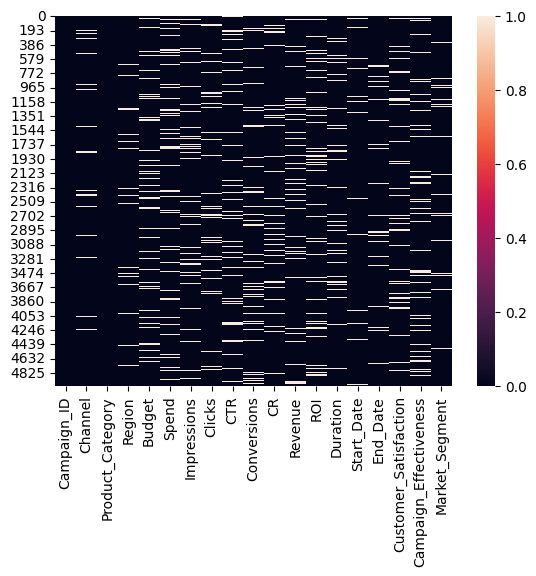

In [85]:
sns.heatmap(df.isnull())

In [87]:
df

Campaign_ID       Channel Product_Category        Region    Budget  \
0           CAM1     Billboard        Groceries  Kuala Lumpur  484341.0   
1           CAM2           NaN      Electronics       Sarawak  468792.0   
2           CAM3         Radio      Electronics        Penang   10487.0   
3           CAM4         Email       Automotive        Penang  345431.0   
4           CAM5         Radio      Electronics  Kuala Lumpur  322345.0   
...          ...           ...              ...           ...       ...   
4995     CAM4996         Email       Automotive  Kuala Lumpur  373204.0   
4996     CAM4997         Radio      Electronics  Kuala Lumpur   81357.0   
4997     CAM4998         Radio      Electronics  Kuala Lumpur  216060.0   
4998     CAM4999  Social Media      Electronics  Kuala Lumpur  120531.0   
4999     CAM5000            TV       Automotive         Sabah  476378.0   

         Spend  Impressions   Clicks     CTR  Conversions      CR   Revenue  \
0     197038.0   545901.000      NaN  0.0785       7993.0  0.3414  849005.0   
1      33743.0   527513.000   4130.0  0.9479       9459.0     NaN  921078.0   
2       6745.0   806911.000  12209.0     NaN       7168.0  0.0517   51142.0   
3     329112.0   108570.000  34391.0  0.6157       7190.0  0.3579  191887.0   
4      34365.0   799855.000  13056.0     NaN       1794.0  0.0544  167241.0   
...        ...          ...      ...     ...          ...     ...       ...   
4995  239182.0   947505.000  27359.0  0.4446       2725.0  0.1643  739721.0   
4996  381641.0   270685.000   2575.0  0.8224       1555.0  0.2425  324435.0   
4997  122475.0  6042568.044  42563.0  0.5894          NaN     NaN  647246.0   
4998  433558.0   857140.000   7037.0  0.2863       3374.0  0.9039  373110.0   
4999  261529.0   308009.000  45922.0  0.5187       3047.0  0.0438  146303.0   

            ROI  Duration Start_Date    End_Date  Customer_Satisfaction  \
0      0.640000     212.0   2/3/2023  23/12/2023                    3.0   
1      3.780000      29.0        NaN         NaN                    3.0   
2      3.640000      74.0  12/4/2023  20/10/2023                    1.0   
3      2.640000      67.0  24/4/2023   26/1/2023                    5.0   
4      1.020000      40.0  10/1/2023    1/1/2023                    5.0   
...         ...       ...        ...         ...                    ...   
4995  17.287862     170.0   4/4/2023  15/12/2023                    4.0   
4996   1.500000     148.0  28/1/2023  26/12/2023                    2.0   
4997        NaN     340.0   7/6/2023   6/12/2023                    3.0   
4998   0.390000      76.0  2/11/2023   23/8/2023                    2.0   
4999   0.770000     330.0   1/1/2023   6/11/2023                    1.0   

      Campaign_Effectiveness Market_Segment  
0                        3.0         Medium  
1                        7.0         Medium  
2                        2.0         Medium  
3                        6.0           High  
4                        6.0            Low  
...                      ...            ...  
4995                     5.0            Low  
4996                     7.0            Low  
4997                     5.0            NaN  
4998                     1.0         Medium  
4999                     1.0           High  

[5000 rows x 19 columns]

In [86]:
#df.dropna(subset=['Channel'],inplace=True)
#df.dropna(subset=['Region'],inplace=True)
#df

## EDA

1. agrupar ppto en tramos 
2. agrupar gasto en tramos 
3. agrupar por rango de dias
4. por ppto las veces que se vio 
5. por ppto las veces que se clico 
6. por ppto la tasa de click 
7. por gasto las veces que se vio 
8. por gasto las veces que se clico 
9. por gasto la tasa de click 
10.por segmento de mercado, el gasto medio 
11. por segmento de mercado, el ppto medio 
12. por segmento de mercado, los ingresos medios 
** seria bueno hacer una correlacion entre ppto y gasto, y gasto e ingresos 
13. canal de marketing donde mas ingresos se obtuvieron 
14.categoria del prodcuto donde mas ingreso se obtuvieron
15. region donde mas ingreso se obtuvieron 
16. por duracion de días de campaña, donde se obtuvieron mas ingresos
canal y categoria donde mas ingreso se obtuvieron 
region canal y categoria donde mas ingreso se obtuvieron 
y luego toda la campaña 

CORRELACION VALORES NUMERICOS (FILTRO POR COLUMNAS NUMERICAS Y MUESTRO LA CORRELACION) HEATMAP

In [111]:
column_types = df.dtypes
l_col_num = []
for i in range(len(df.columns)):
    if column_types[i] == 'int64' or column_types[i] == 'float64':
        l_col_num.append(df.columns[i])
print(l_col_num)
l_col_cat = []
for i in range(len(df.columns)):
    if column_types[i] == 'object':
        l_col_cat.append(df.columns[i])
l_col_cat.remove('Start_Date')  #eliminamos las fechas de esta lista
l_col_cat.remove('End_Date')
print(l_col_cat)
#l_col_num columnas numericas
#l_col_cat columnas categoricas
df_fact = df[l_col_cat + l_col_num]
df_fact[l_col_cat] = df_fact[l_col_cat].apply(lambda x: pd.factorize(x)[0])

['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', 'Duration', 'Customer_Satisfaction', 'Campaign_Effectiveness']
['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Market_Segment']


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21916\3361124321.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column_types[i] == 'int64' or column_types[i] == 'float64':
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21916\3361124321.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column_types[i] == 'object':
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21916\3361124321.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

<Axes: xlabel='Budget', ylabel='Count'>

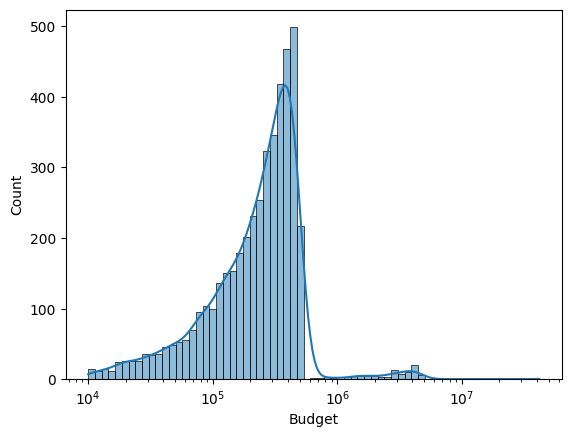

In [112]:
sns.histplot(df['Budget'], kde=True, log_scale=True)

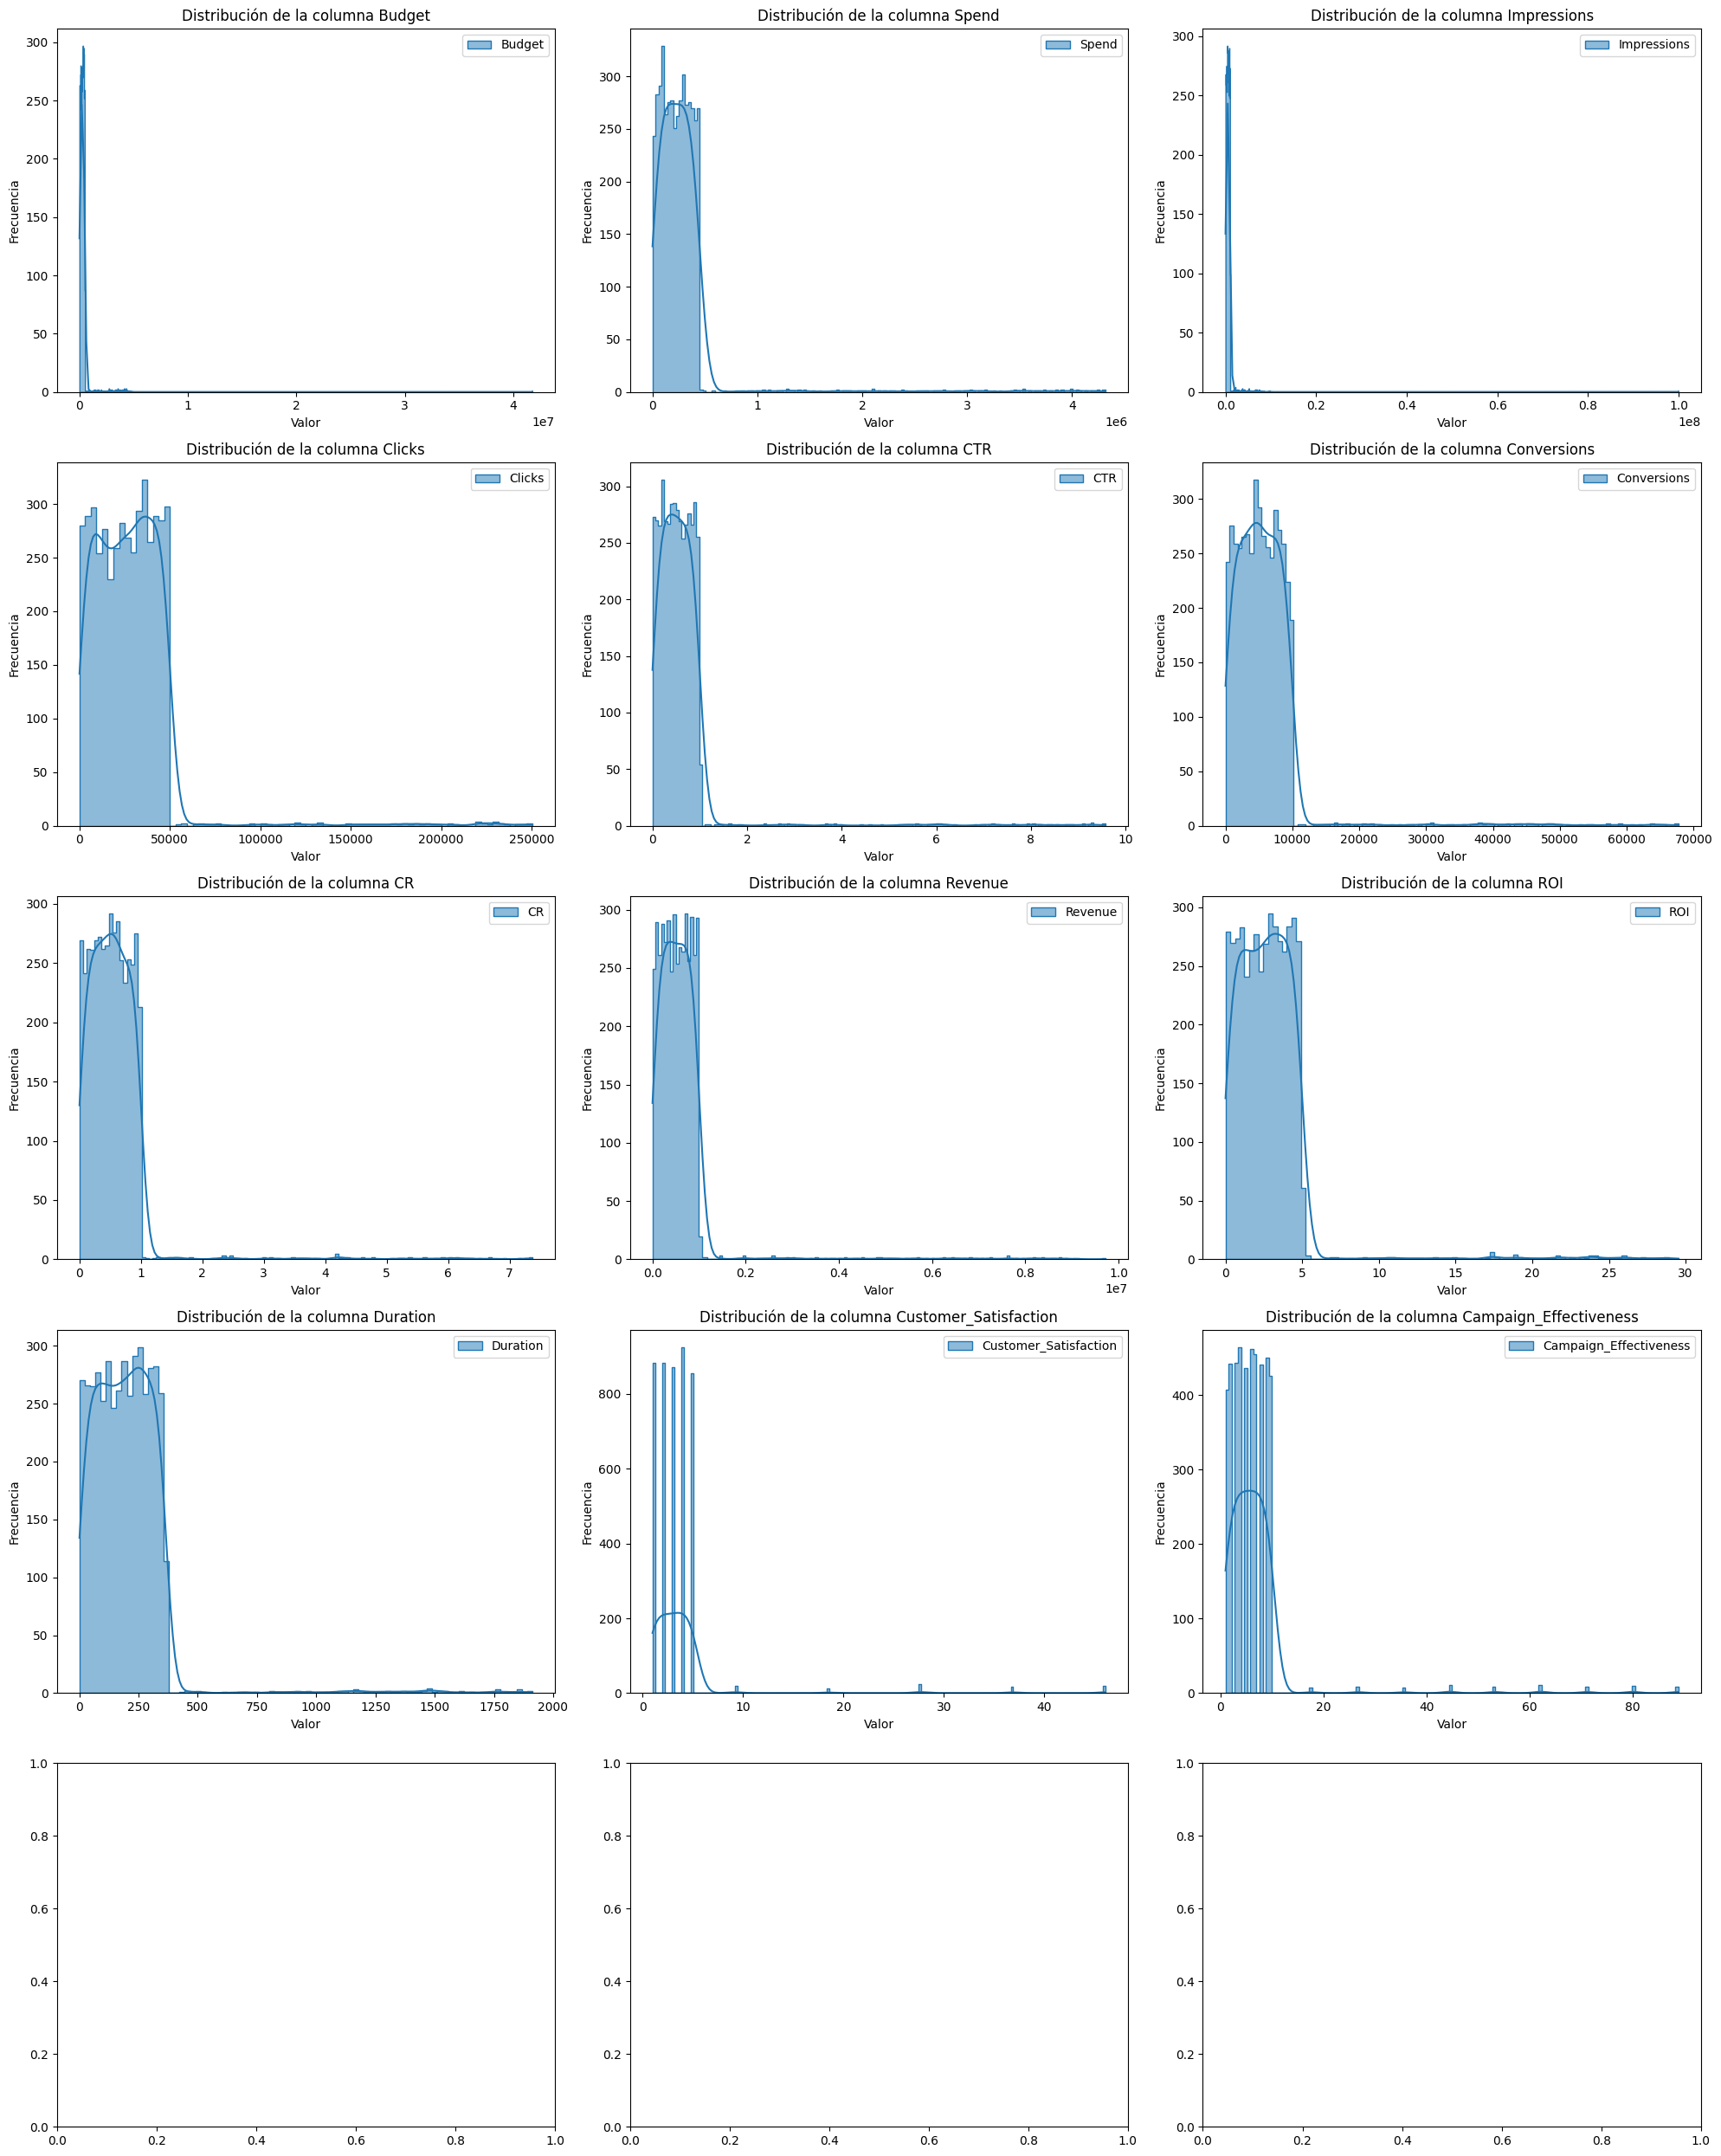

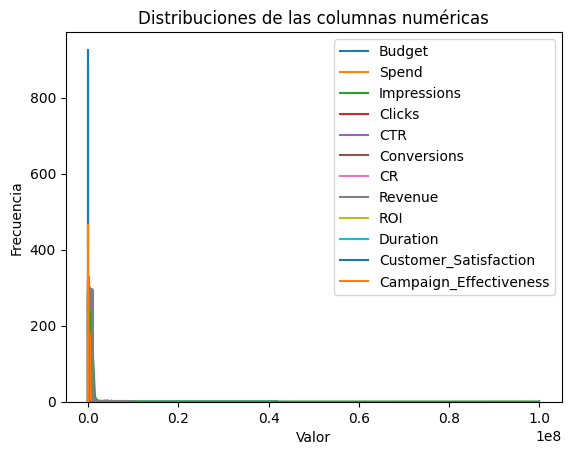

In [113]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()
 
for i, column in enumerate(l_col_num):
    sns.histplot(df[column], kde=True, log_scale=False, label=column, element="step", fill=True, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f'Distribución de la columna {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
 
plt.tight_layout()
plt.show()
for column in l_col_num:
    sns.histplot(df[column], kde=True, log_scale=False, label=column, element="step", fill=False)
plt.legend()
plt.title('Distribuciones de las columnas numéricas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

IndexError: index 36 is out of bounds for axis 0 with size 36

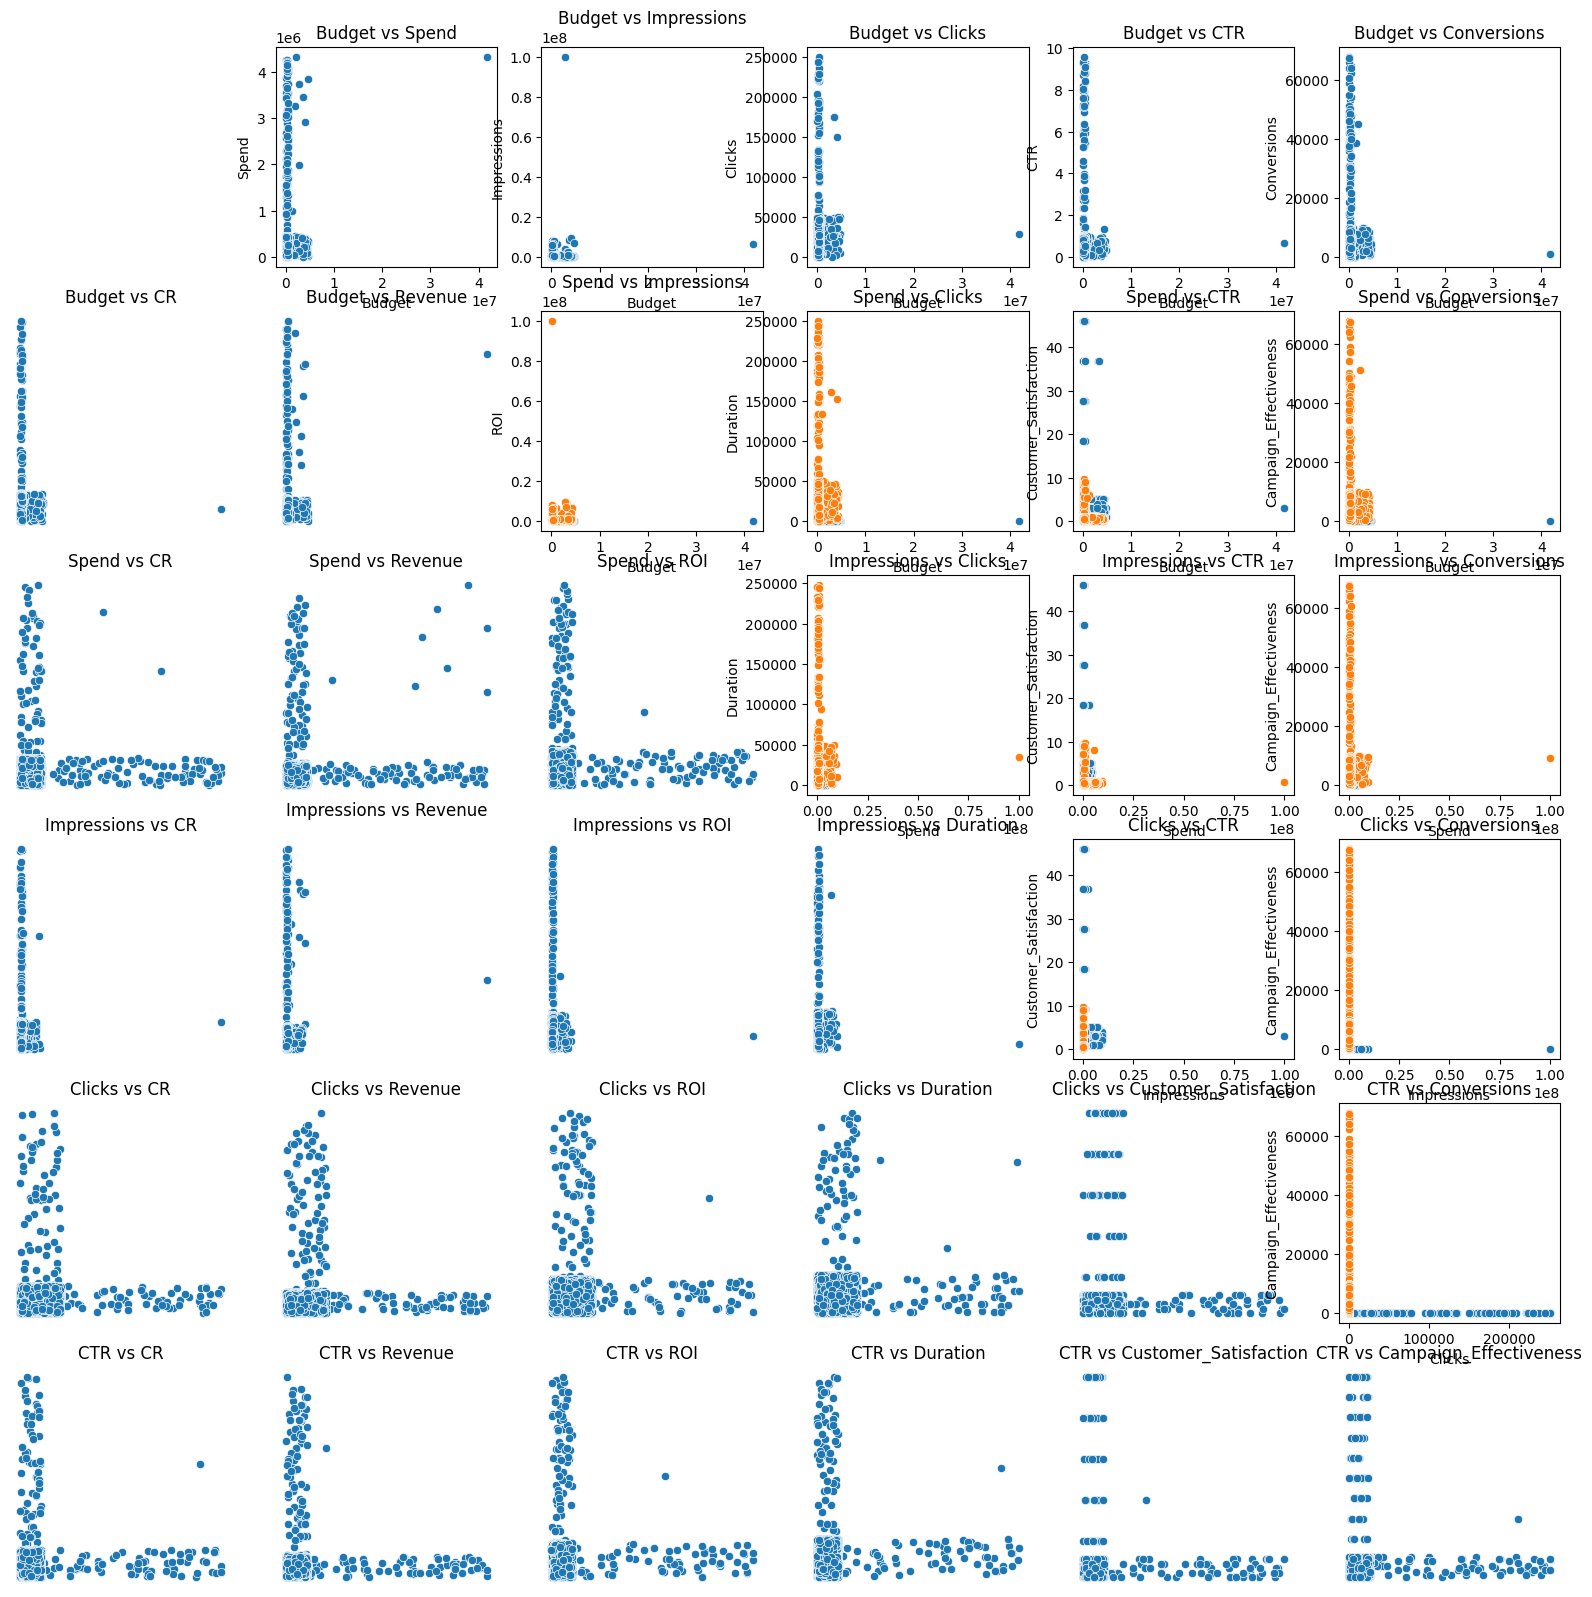

In [114]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axes = axes.flatten()
 
for i, col1 in enumerate(l_col_num):
    for j, col2 in enumerate(l_col_num):
        if i < j:
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i*6 + j])
            axes[i*6 + j].set_title(f'{col1} vs {col2}')
        else:
            axes[i*6 + j].axis('off')
 
plt.tight_layout()
plt.show()